In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT

from my_utils import *

def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(  np.dot(deviations**2,weights)   )
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(  sum(deviations**2) /len(x)  )
def list_mean(x):
  mean = sum(x)/len(x)
  return mean

Welcome to JupyROOT 6.14/04


In [2]:
#db.board_list()
import tdc_daq as td
import matplotlib.pyplot as plt
import time
import db

#set all boards to standby
for my_board in db.board_list():
      db.set_standby_board(my_board)
      ptc.set_threshold_for_board_by_name(my_board,127)
      db.disable_board(my_board)


peaking time =  10 , gain =  1


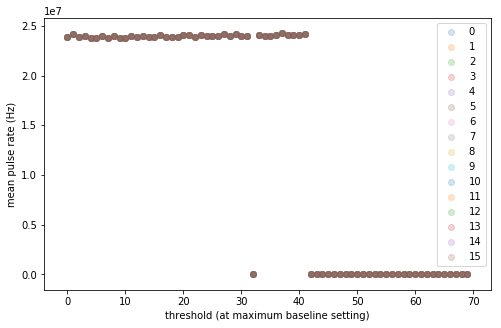

0101 average(16chan) noise thresh: mean =  20.256  +-  0.0   |  RMS  =  12.138  +-  0.0


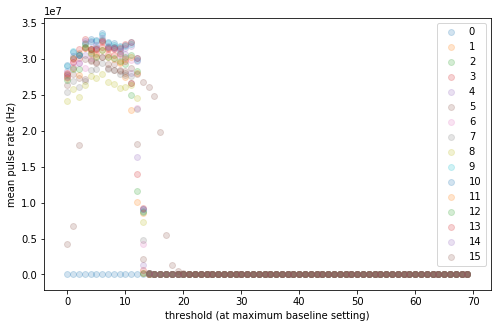

0010 average(16chan) noise thresh: mean =  5.851  +-  1.534   |  RMS  =  3.572  +-  0.673
peaking time =  10 , gain =  2


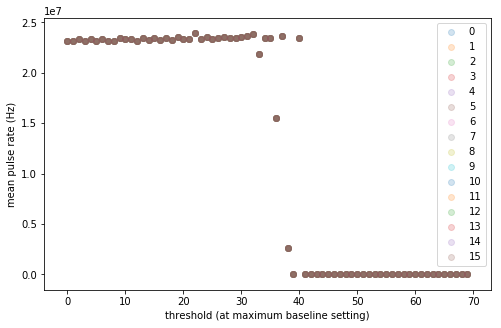

0101 average(16chan) noise thresh: mean =  18.991  +-  0.0   |  RMS  =  11.304  +-  0.0


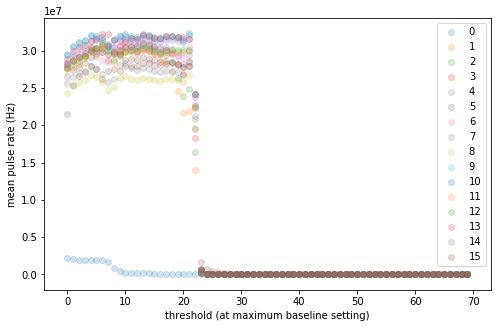

0010 average(16chan) noise thresh: mean =  10.488  +-  1.62   |  RMS  =  6.31  +-  0.78
peaking time =  10 , gain =  4


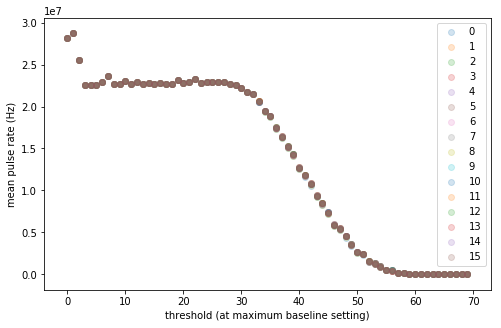

0101 average(16chan) noise thresh: mean =  20.849  +-  0.026   |  RMS  =  13.217  +-  0.017


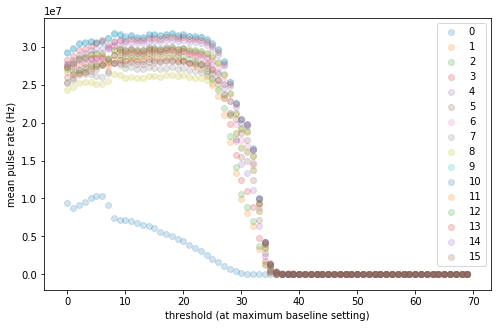

0010 average(16chan) noise thresh: mean =  15.012  +-  1.283   |  RMS  =  9.054  +-  0.504
peaking time =  15 , gain =  1


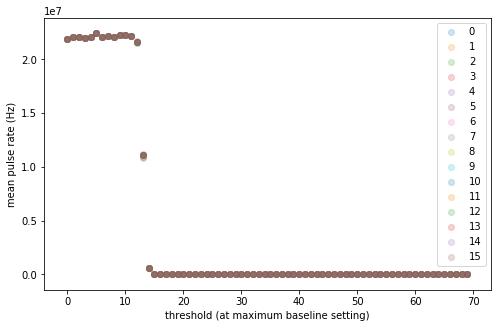

0101 average(16chan) noise thresh: mean =  6.28  +-  0.003   |  RMS  =  3.908  +-  0.002


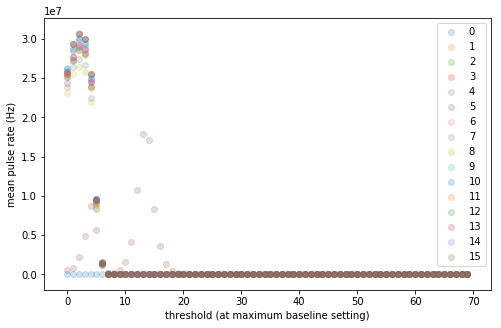

0010 average(16chan) noise thresh: mean =  2.623  +-  2.182   |  RMS  =  1.65  +-  0.837
peaking time =  15 , gain =  2


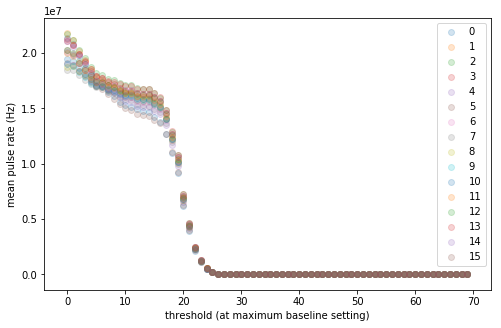

0101 average(16chan) noise thresh: mean =  9.294  +-  0.124   |  RMS  =  6.115  +-  0.018


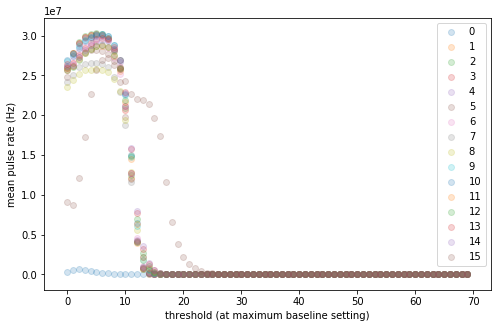

0010 average(16chan) noise thresh: mean =  5.451  +-  1.149   |  RMS  =  3.408  +-  0.497
peaking time =  15 , gain =  4


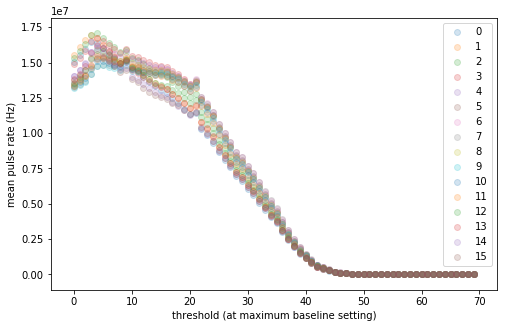

0101 average(16chan) noise thresh: mean =  15.346  +-  0.412   |  RMS  =  10.193  +-  0.045


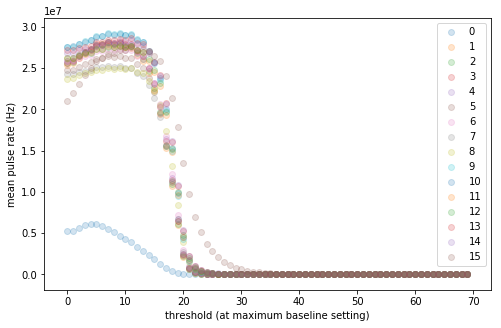

0010 average(16chan) noise thresh: mean =  8.799  +-  0.73   |  RMS  =  5.471  +-  0.379
peaking time =  20 , gain =  1


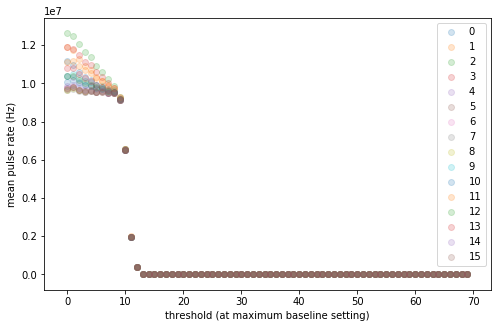

0101 average(16chan) noise thresh: mean =  4.872  +-  0.088   |  RMS  =  3.197  +-  0.006


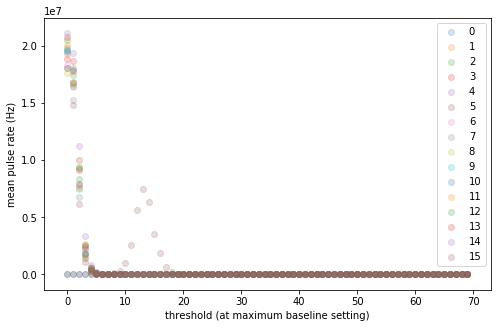

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


0010 average(16chan) noise thresh: mean =  nan  +-  nan   |  RMS  =  nan  +-  nan
peaking time =  20 , gain =  2


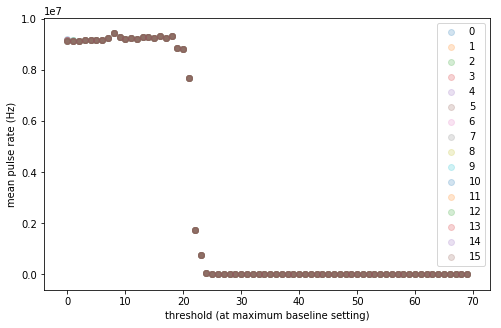

0101 average(16chan) noise thresh: mean =  10.561  +-  0.002   |  RMS  =  6.381  +-  0.001


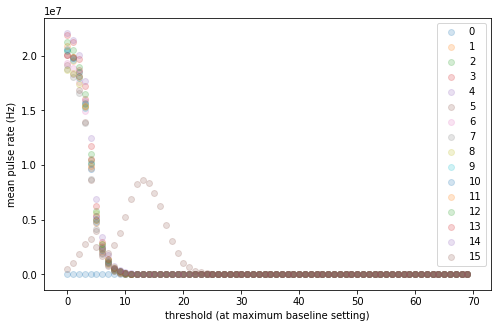

0010 average(16chan) noise thresh: mean =  2.66  +-  2.388   |  RMS  =  1.955  +-  0.75
peaking time =  20 , gain =  4


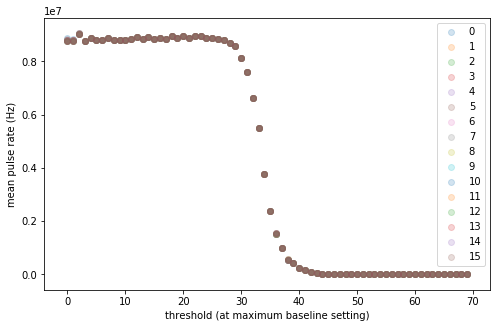

IndexError: list assignment index out of range

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

In [8]:
## scan threshold of all boar
from functools import (reduce)
from math import (sqrt)
import numpy as np
import time
import tdc_daq as td
import matplotlib.pyplot as plt

# rootMeanSquare :: [Num] -> Float
def rootMeanSquare(xs):
    return sqrt(reduce(lambda a, x: a + x * x, xs, 0) / len(xs))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)

ptime_list = [ 10, 15, 20 ]
# ptime_list = [ 15 ]
pt_gain_list = [ 1, 2, 4 ]
# pt_gain_list = [4]  

#for my_board in db.board_list():
#  db.unset_standby_board(my_board) #name = "0029" #PASSTEC board id (inside )

#used_boards = [ "0005", "0017", "0014", "0025" ]
#used_boards = [ "0101", "0102", "0103", "0010" , "0009", "0004", "0025"]
used_boards = ["0101", "0010"]
#, "0010", "0102", "0103"]
n_scan_steps = len(ptime_list)*len(pt_gain_list)

plt.rcParams["figure.figsize"] = (8,5)
trendtime_list = []
rmsAverageTrend_list = []
rmsAverageTrendError_list = []
meanAverageTrend_list = []
meanAverageTrendError_list = []

scaler_list_channel = [[[] for i in range(n_scan_steps) ]  for i in range(16)] 

scan_step = -1

for ptime in ptime_list: 
 for pt_gain in pt_gain_list:     
   scan_step += 1 
   print("------------------- n\ peaking time = ", ptime, ", gain = ", pt_gain)
   for name in used_boards: 
    #if name == "0013" or name == "0018":
    #  continue
    for my_board in db.board_list():
      db.set_standby_board(my_board)
    db.unset_standby_board(name)
    td.enable_tdc_channels_of_active_boards()
    ptc.init_active_boards()
   
    #time.sleep(60)
    trendtime_list += [ name ]
    ptc.init_boards_by_name(used_boards, ptime, pt_gain)   
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
    calib       = db.get_calib_json_by_name(name)
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    board_info  = db.find_board_by_name(name)

    #print(json.dumps(dummy_calib,indent=2, sort_keys=True))
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

    scaler_list = []
    scaler_list = td.scaler_rate_of_board(name,0.2)
    

    for i in range(0,16):
     plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

     plt.legend()
     plt.xlabel("threshold (at maximum baseline setting)")
     plt.ylabel("mean pulse rate (Hz)")
     #plt.yscale('log') 
    plt.show()

    fwhm_list = []
    max_list  = []
    rms_list = []
    mean_list = []
    for i in range(0,16):
      fwhm_list += [ fwhm(tsbl_range,tsbl_scan_raw[i]) ]
      rms_list += [ hist_rms(tsbl_range,tsbl_scan_raw[i]) ]
      mean_list += [ MeanArrays(tsbl_range,tsbl_scan_raw[i]) ]  
      max_list  += [ np.max(tsbl_scan_raw[i])  ]
      scaler_list_channel[i][scan_step] = tsbl_scan_raw[i] 

    fwhm_list = np.array(fwhm_list)
    max_list  = np.array(max_list)
    
    print(name, "average(16chan) noise thresh: mean = ", round(sum(mean_list)/len(mean_list),3), " +- ", round(list_rms(mean_list),3), "  |  RMS  = ", round(sum(rms_list)/len(rms_list),3), " +- ", round(list_rms(rms_list),3) )

    meanAverageTrend_list += [ sum(mean_list)/len(mean_list) ]
    meanAverageTrendError_list += [ list_rms(mean_list) ]
    rmsAverageTrend_list += [ sum(rms_list)/len(rms_list) ]
    rmsAverageTrendError_list += [ list_rms(rms_list) ]    
for ch in range(0,16):
    print("channel : ",ch)
    for i in range(0,len(scaler_list_channel[ch])):
     plt.scatter(tsbl_range,scaler_list_channel[ch][i],alpha=0.2,label = "{:d}".format(baseline[i]))

     plt.legend()
     plt.xlabel("threshold (at maximum baseline setting)")
     plt.ylabel("mean pulse rate (Hz)")
     #plt.yscale('log') 
    plt.show()
#     plt.scatter(list(range(0,16)), mean_list)
#     plt.xlabel("channel no")
#     plt.ylabel("mean")
#     plt.show()
#     plt.scatter(list(range(0,16)), rms_list)
#     plt.xlabel("channel no")
#     plt.ylabel("RMS")
#     plt.title("noise width (RMS)")
#     plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = (8,15)
for ch in range(0,16):
    print("channel : ",ch)
    for i in range(0,len(scaler_list_channel[ch])):
     nums = np.array(scaler_list_channel[ch][i])*10**(16-ch)
     plt.scatter(tsbl_range,nums,alpha=0.2,label = "{:d}".format(baseline[i]))

     #plt.legend()
     plt.xlabel("threshold (at maximum baseline setting)")
     plt.ylabel("mean pulse rate (Hz)")

plt.yscale('log') 
plt.ylim(ymax = 1E24, ymin = 1E1)
plt.show()